In [413]:
#importing libraries

In [414]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [415]:
#Reading excel
df=pd.read_excel('Final_Train.Xlsx')

In [416]:
test=pd.read_excel('Final_Test.Xlsx')

In [417]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [419]:
#We need to build a model which can predict the fees 

In [420]:
#Data exploration and preprocessing

In [421]:
#to see the highest fees paid
df['Fees'].max()

950

In [422]:
df[df['Fees']== 950]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
293,"MBBS, MD - Internal Medicine, FRCP",29 years experience,100%,"Adyar, Chennai",General Medicine,"100% 175 Feedback Adyar, Chennai",950


In [423]:
#Lets change the experience into numerical variable by splitting the data with help of split function

In [424]:
#Clean experience field
def changeexperience(x):
    exp=x.split(' ')
    return exp[0]

In [425]:
df['Experience']=df['Experience'].apply(changeexperience)

In [426]:
df['Experience'].head(5)

0    24
1    12
2     9
3    12
4    20
Name: Experience, dtype: object

In [427]:
test['Experience']=test['Experience'].apply(changeexperience)

In [428]:
test['Experience'].head(5)

0    35
1    31
2    40
3     0
4    16
Name: Experience, dtype: object

In [429]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [430]:
#There looks no relevant information in miscellaneous info hence lets drop it

In [431]:
df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [432]:

test.drop('Miscellaneous_Info',axis=1,inplace=True)

In [433]:
df['Qualification'].nunique()

1420

In [434]:
df['Qualification'].head()

0             BHMS, MD - Homeopathy
1      BAMS, MD - Ayurveda Medicine
2    MBBS, MS - Otorhinolaryngology
3               BSc - Zoology, BAMS
4                              BAMS
Name: Qualification, dtype: object

In [435]:
#Define function to remove inconsistencies in the data

In [436]:
def changequal(x):
    var1=x.split(' ')#splitting on basis of ' '
    var2=x.split(',')#Further splitting on basis of ','
    if ',' not in x:
        return var1[0]
    else:
        return var2[0]

In [437]:
df['Qualification']=df['Qualification'].apply(changequal)


In [438]:
df.head(5)

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,24,100%,"Kakkanad, Ernakulam",Homeopath,100
1,BAMS,12,98%,"Whitefield, Bangalore",Ayurveda,350
2,MBBS,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,BSc - Zoology,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,250


In [439]:
#I can further see few records which still have values like Bsc-Zoology . To remove the '-'

In [440]:
def removehyphen(x):
    var3=x.split('-')
    if '-' in x:
        return var3[0]
    else:
        return x

In [441]:

df['Qualification']=df['Qualification'].apply(removehyphen)

In [442]:
df['Qualification'].head()

0    BHMS
1    BAMS
2    MBBS
3    BSc 
4    BAMS
Name: Qualification, dtype: object

In [443]:
#Applying the same transformation to test dataset

In [444]:
test['Qualification']=test['Qualification'].apply(changequal)

In [445]:
test['Qualification']=test['Qualification'].apply(removehyphen)

In [446]:
test['Qualification'].value_counts()


MBBS                                                                   865
BDS                                                                    371
BHMS                                                                   232
BAMS                                                                   228
MD                                                                      74
MDS                                                                     48
MS                                                                      31
MD                                                                      18
MDS                                                                     13
DDVL                                                                    13
DNB                                                                     13
DHMS (Diploma in Homeopathic Medicine and Surgery)                       7
Get                                                                      6
B.Sc                     

In [447]:
#To further remove the inconsistensies in data .First using strip to split from the character and then renaming using the loop for the already abbreviated


In [448]:
   def cleanqual(x):
    var=x.strip('.')
    tab= var.lower()
    mylist=['bsc','diploma','certifi','doctor']
    if mylist[0] in tab:
        return 'BSC'
    elif mylist[1] in tab:
        return 'Diploma'
    elif mylist[2] in tab:
        return 'Certification'
    elif mylist[3] in tab:
        return 'PhD'
    else:
        return x


In [449]:
test['Qualification']=test['Qualification'].apply(cleanqual)

In [450]:
test['Qualification'].head(5)

0    MBBS
1    MBBS
2    MBBS
3    BAMS
4     BDS
Name: Qualification, dtype: object

In [451]:
df['Qualification']=df['Qualification'].apply(cleanqual)

In [452]:
df['Qualification'].head(5)

0    BHMS
1    BAMS
2    MBBS
3     BSC
4    BAMS
Name: Qualification, dtype: object

In [453]:
#Clean place

In [454]:
import re
def clean_place(x):
    x = str(x).lower()
    x = re.sub(r'[^a-z0-9]', ' ', x)
    x = re.sub(r'\s+', ' ', x)
    return x

In [455]:
df['Place'].fillna('missing', inplace=True)
test['Place'].fillna('missing', inplace=True)
df['Place'] = df['Place'].apply(clean_place)
test['Place'] = test['Place'].apply(clean_place)

In [456]:
df['Place'].head(5)

0             kakkanad ernakulam
1           whitefield bangalore
2        mathikere bel bangalore
3    bannerghatta road bangalore
4           keelkattalai chennai
Name: Place, dtype: object

In [457]:
#Check on missing values or null
df.isnull().sum()

Qualification       0
Experience          0
Rating           3302
Place               0
Profile             0
Fees                0
dtype: int64

In [458]:
#hence lets process data to handle nulls in rating 

df['Rating'].isnull().any()

True

In [459]:
df['Rating'].head(5)

0    100%
1     98%
2     NaN
3     NaN
4    100%
Name: Rating, dtype: object

In [460]:
df['Rating'].fillna('0%', inplace=True)
test['Rating'].fillna('0%', inplace=True)

In [461]:
df['Rating'].head(5)

0    100%
1     98%
2      0%
3      0%
4    100%
Name: Rating, dtype: object

In [462]:
#clean data and remove the % to convert to numerical data
def removepercent(x):
    var4=x.split('%')
    if '%' in x:
        return var4[0]
    else:
        return x




In [463]:
df['Rating'] = df['Rating'].apply(removepercent)


test['Rating'] = test['Rating'].apply(removepercent)

In [464]:
df['Rating'].head(5)

0    100
1     98
2      0
3      0
4    100
Name: Rating, dtype: object

In [465]:
test['Rating'].head(5)

0      0
1      0
2     70
3      0
4    100
Name: Rating, dtype: object

In [466]:
df['Place'].value_counts()

hsr layout bangalore          75
andheri west mumbai           70
dwarka delhi                  67
banjara hills hyderabad       64
mulund west mumbai            54
                              ..
kuppakonanpudur coimbatore     1
vileparle mumbai               1
vasant enclave delhi           1
jeevan park delhi              1
koovappady ernakulam           1
Name: Place, Length: 877, dtype: int64

In [467]:
#We can see that the place has a area and city, lets get it city basis to have a better vision by city

In [468]:
def Place(x):
    var5=str(x).split(' ')
    return var5[-1]

In [469]:
df['Place']=df['Place'].apply(Place)

In [470]:
test['Place']=test['Place'].apply(Place)

In [471]:
df['Place'].head(5)

0    ernakulam
1    bangalore
2    bangalore
3    bangalore
4      chennai
Name: Place, dtype: object

In [472]:
test['Place'].head(5)

0       mumbai
1    hyderabad
2      chennai
3        delhi
4    bangalore
Name: Place, dtype: object

In [473]:
#converting categorical variables to meaningful numbers

In [474]:
df['Rating'].min()

'0'

In [475]:
df['Rating'].head(5)

0    100
1     98
2      0
3      0
4    100
Name: Rating, dtype: object

In [476]:
#If there's rating till 100 so 50 would be mean .Lets also check the fees 

In [477]:
df['Rating']=df['Rating'].astype(int)

test['Rating']=test['Rating'].astype(int)

In [478]:
df[df['Rating']<50]

,Qualification,Experience,Rating,Place,Profile,Fees
2,MBBS,9,0,bangalore,ENT Specialist,300
3,BSC,12,0,bangalore,Ayurveda,250
5,BAMS,8,0,chennai,Ayurveda,100
6,BHMS,42,0,delhi,Homeopath,200
8,MBBS,14,0,hyderabad,General Medicine,100
...,...,...,...,...,...,...
5951,BDS,4,0,bangalore,Dentist,200
5952,MBBS,47,0,mumbai,General Medicine,100
5954,BHMS,31,0,delhi,Homeopath,300
5955,MD,10,0,delhi,Homeopath,300


In [479]:
#Correlation matrix 

In [480]:
#To see correlation among various variables

In [481]:
df.corr()

,Rating,Fees
Rating,1.000000,0.153273
Fees,0.153273,1.000000


In [482]:
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,24,100,ernakulam,Homeopath,100
1,BAMS,12,98,bangalore,Ayurveda,350
2,MBBS,9,0,bangalore,ENT Specialist,300
3,BSC,12,0,bangalore,Ayurveda,250
4,BAMS,20,100,chennai,Ayurveda,250
...,...,...,...,...,...,...
5956,MBBS,19,98,bangalore,ENT Specialist,300
5957,MBBS,33,0,chennai,General Medicine,100
5958,MBBS,41,97,delhi,General Medicine,600
5959,MBBS,15,90,mumbai,General Medicine,100


In [483]:
#LAets plot a graph to understand 

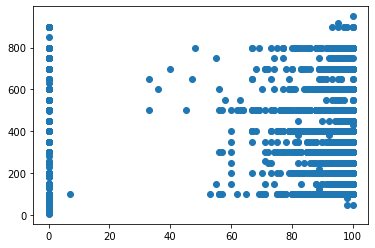

In [484]:
plt.scatter(df['Rating'],df['Fees'])

In [485]:
# lets plot the graph between places and how it impacts fees taken by doctor

df.groupby('Place')['Fees'].mean()

Place
bangalore             328.842607
chennai               283.602339
coimbatore            154.298246
delhi                 362.911392
e                     250.000000
ernakulam             188.431373
hyderabad             307.507886
missing               102.000000
mumbai                308.292863
thiruvananthapuram    167.267442
Name: Fees, dtype: float64

In [486]:
#Lets do similar exercise with rating

In [487]:
df['Rating'].head(5)

0    100
1     98
2      0
3      0
4    100
Name: Rating, dtype: int32

In [488]:
#Since max rating is 100 hence assuming 50 as mean 

In [489]:
def rating(x):
    if x<=50: #50 because of max rating is 100
        return 1 #because of the meaningful magnitude
    if x>50:
        return 2

In [490]:
df['Rating']=df['Rating'].apply(rating)

In [491]:
test['Rating']=test['Rating'].apply(rating)

In [492]:
#Now lets understand relation between rating and fees

In [493]:
df.groupby('Rating')['Fees'].mean()

Rating
1    280.487311
2    342.227461
Name: Fees, dtype: float64

In [494]:
df['Rating'].value_counts(normalize=True)

1    0.555276
2    0.444724
Name: Rating, dtype: float64

In [495]:
#Lets look at the feature Experience

In [496]:
df['Experience'].min()

'0'

In [497]:
df['Experience'].max()

'9'

In [498]:
df['Experience']=df['Experience'].astype(int)

test['Experience']=test['Experience'].astype(int)

In [499]:
def experience(x):
    if x<=5:  #because the max experience is 9
        return 1 #for meaningful magnitude
    if x>5:
        return 2
   

In [500]:
df['Experience']=df['Experience'].apply(experience)

In [501]:
test['Experience']=test['Experience'].apply(experience)

In [502]:
df['Experience'].value_counts(normalize=True)

2    0.904378
1    0.095622
Name: Experience, dtype: float64

In [503]:
#Only 1 value so no further processing

In [504]:
#Data Visualization

In [505]:
place=df.groupby('Place')['Fees'].mean()

In [506]:
df['Place']=df['Place'].map(place)

In [507]:
test['Place']=test['Place'].map(place)

In [508]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,2,2,188.431373,Homeopath,100
1,BAMS,2,2,328.842607,Ayurveda,350
2,MBBS,2,1,328.842607,ENT Specialist,300
3,BSC,2,1,328.842607,Ayurveda,250
4,BAMS,2,2,283.602339,Ayurveda,250


In [509]:
profile=df.groupby('Profile')['Fees'].mean()

In [510]:
df['Profile']=df['Profile'].map(profile)

In [511]:

test['Profile']=test['Profile'].map(profile)

In [512]:
qualification=df.groupby('Qualification')['Fees'].mean()

In [513]:
df['Qualification']=df['Qualification'].map(qualification)

In [514]:
test['Qualification']=test['Qualification'].map(qualification)

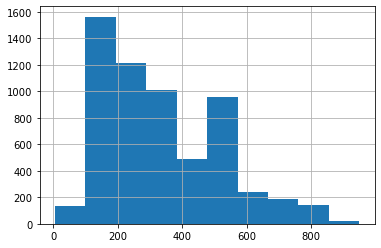

In [515]:
df['Fees'].hist()

In [516]:
df['Fees'].head(5)

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [379]:
#Building Model

In [380]:
#Splitting the data

In [517]:
X=df.drop('Fees',axis=1)
y=df['Fees']

In [518]:
from sklearn.model_selection import train_test_split

In [519]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [520]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4172, 5), (4172,), (1789, 5), (1789,))

In [521]:
X_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile'], dtype='object')

In [522]:
#!pip install xgboost

In [523]:
# from sklearn.preprocessing import StandardScaler


from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [524]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [525]:
#Using SVR
#First splitting the training set and running a mock analysis on that and then training df_train and predicting from data of df_test

In [526]:
from sklearn.svm import SVR
reg = SVR(gamma = 0.1)
reg.fit(X_train,y_train)
ans = reg.predict(scaler.transform(X_test))

In [527]:
#Function to define score

In [528]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

In [529]:
score(ans,y_test)


0.7975988847008451

In [530]:
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
scorer = make_scorer(score,greater_is_better=True)

In [531]:
from sklearn.model_selection import GridSearchCV

parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
reg2 = GridSearchCV(reg,param_grid=parameters,scoring=scorer, n_jobs=-1,cv=4)

In [532]:
reg2.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=SVR(gamma=0.1), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring=make_scorer(score))

In [533]:
ans2 = reg2.predict(scaler.transform(X_test))

In [534]:
score(ans2, y_test)

0.7981923402594158

In [535]:
X_test=test[~test.isin([np.nan, np.inf, -np.inf]).any(1)]

In [536]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Fees',axis=1))
y = df['Fees']
X_test = scaler.transform(X_test)

reg3 = SVR(gamma = 0.1)
# reg3.fit(X_train,y_train)

parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
reg4 = GridSearchCV(reg3,param_grid=parameters,scoring='r2', n_jobs=-1,cv=4)
reg4.fit(X,y)
ans = reg4.predict(X_test)

In [537]:
#Training data score
ansX = reg4.predict(X)
print("Training data score {}".format(score(y, ansX)))

Training data score 0.7990844831533821


In [538]:
#Predicted fees with SVR 

In [539]:
s = pd.Series(ans)
s.values[:10]

array([291.61202105, 337.32802383, 375.50261908, 226.68252879,
       250.10011113, 222.04439417, 399.90048864, 236.86940064,
       320.66240621, 294.64540786])

In [540]:
#Using KNN Regressor

In [541]:
#First splitting the training set and running a mock analysis on that and then training df_train and predicting from data of df_test¶

In [542]:
from sklearn.model_selection import train_test_split
X=df.drop('Fees',axis=1)
y = df['Fees']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

poly = PolynomialFeatures(2)

In [543]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train_2 = poly.fit_transform(X_train)

In [545]:
neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X_train_2, y_train)

KNeighborsRegressor(n_neighbors=20)

In [546]:
X_test = scaler.transform(X_test)
X_test_2 = poly.transform(X_test)
ans = neigh.predict(X_test_2)

In [547]:
score(ans,y_test)

0.8068139746800869

In [549]:
# from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Fees',axis=1))
y = df['Fees']
X_test = scaler.transform(test)

neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X, y)

ans = neigh.predict(X)

In [550]:
score(ans,y)

0.7940989340850593

In [552]:
X_test1=test[~test.isin([np.nan, np.inf, -np.inf]).any(1)]

In [553]:
scaler = StandardScaler()
poly = PolynomialFeatures(3)


X = scaler.fit_transform(df.drop('Fees',axis=1))
X_2 = poly.fit_transform(X)
y = df['Fees']
X_test = scaler.transform(X_test1)
X_test_2 = poly.transform(X_test)

neigh = KNeighborsRegressor()
parameters = {'n_neighbors':np.arange(2,20)}

reg = GridSearchCV(neigh,param_grid=parameters,scoring=scorer, n_jobs=-1,cv=4)
reg.fit(X_2,y)

GridSearchCV(cv=4, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring=make_scorer(score))

In [554]:
ans = reg.predict(X_2)
print("Traing data score {}".format(score(ans,y)))

Traing data score 0.7970507474888564


In [555]:
#Predicted fees with KNN Regressor

In [556]:
ans = reg.predict(X_test_2)

In [557]:
s = pd.Series(ans)
s.values[:10]

array([189.47368421, 396.31578947, 397.36842105, 244.73684211,
       273.68421053, 221.05263158, 455.26315789, 205.26315789,
       357.89473684, 252.63157895])

In [558]:
#Model saving . As per scores obtained SVR looks to be the best hoever other models are close by

In [559]:
import pickle
filename='Doctor-con.pkl'
pickle.dump(reg,open(filename,'wb'))

In [565]:
from pandas import ExcelWriter


In [566]:
df_sub = pd.DataFrame(data=ans, columns=['Fees'])
writer = pd.ExcelWriter('outputdoctor.X)
df_sub.to_excel(writer, encoding='utf8', index=False)
writer.save()